### Practiced through this article https://towardsdatascience.com/machine-learning-with-datetime-feature-engineering-predicting-healthcare-appointment-no-shows-5e4ca3a85f96

In [111]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/noshowappointments/KaggleV2-May-2016.csv


In [112]:
import pandas as pd 
import numpy as np
import matplotlib as plt

In [113]:
df = pd.read_csv('/kaggle/input/noshowappointments/KaggleV2-May-2016.csv')

In [114]:
df.shape

(110527, 14)

In [115]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [116]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [117]:
df.describe

<bound method NDFrame.describe of            PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
...              ...            ...    ...                   ...   
110522  2.572134e+12        5651768      F  2016-05-03T09:15:35Z   
110523  3.596266e+12        5650093      F  2016-05-03T07:27:33Z   
110524  1.557663e+13        5630692      F  2016-04-27T16:03:52Z   
110525  9.213493e+13        5630323      F  2016-04-27T15:09:23Z   
110526  3.775115e+14        5629448      F  2016-04-27T13:30:56Z   

              AppointmentDay  Age      Neighbourhood  Scholarship  \
0       2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0   
1       201

In [118]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [119]:
df['OUTPUT_LABEL'] = (df['No-show'] == 'Yes').astype(int)

In [120]:
# check the prevalence of our OUTPUT_LABEL:


In [121]:
def calc_prevalence(y):
    return (sum(y)/len(y))

In [122]:
calc_prevalence(df.OUTPUT_LABEL.values) 

0.20193255946510807

##### which means that 1 in 5 patients will miss their scheduled appointment.

##### Now let’s work with the datetime columns by looking at the first 5 rows of ScheduledDay and AppointmentDay

In [125]:
df.ScheduledDay.head()

0    2016-04-29T18:38:08Z
1    2016-04-29T16:08:27Z
2    2016-04-29T16:19:04Z
3    2016-04-29T17:29:31Z
4    2016-04-29T16:07:23Z
Name: ScheduledDay, dtype: object

In [126]:
df.AppointmentDay.head()

0    2016-04-29T00:00:00Z
1    2016-04-29T00:00:00Z
2    2016-04-29T00:00:00Z
3    2016-04-29T00:00:00Z
4    2016-04-29T00:00:00Z
Name: AppointmentDay, dtype: object

#### data types for both columns is object(strings)
#### ScheduledDay has times where as Appointment Day has all the times as 00:00:00.to_datetime
#### (Note:didn’t included the time of the appointment in the dataset it would have been better)

In [128]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], 
 format = '%Y-%m-%dT%H:%M:%SZ',errors = 'coerce')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'],format = '%Y-%m-%dT%H:%M:%SZ',errors = 'coerce')

In [129]:
df['ScheduledDay']

0        2016-04-29 18:38:08
1        2016-04-29 16:08:27
2        2016-04-29 16:19:04
3        2016-04-29 17:29:31
4        2016-04-29 16:07:23
                 ...        
110522   2016-05-03 09:15:35
110523   2016-05-03 07:27:33
110524   2016-04-27 16:03:52
110525   2016-04-27 15:09:23
110526   2016-04-27 13:30:56
Name: ScheduledDay, Length: 110527, dtype: datetime64[ns]

In [130]:
assert df.ScheduledDay.isnull().sum() == 0,'missing ScheduledDay Dates'
assert df.AppointmentDay.isnull().sum() == 0, 'missing AppointmentDay dates'

In [131]:
df['AppointmentDay']

0        2016-04-29
1        2016-04-29
2        2016-04-29
3        2016-04-29
4        2016-04-29
            ...    
110522   2016-06-07
110523   2016-06-07
110524   2016-06-07
110525   2016-06-07
110526   2016-06-07
Name: AppointmentDay, Length: 110527, dtype: datetime64[ns]

In [132]:
df.ScheduledDay.isnull().sum()

0

In [133]:
df.AppointmentDay.isnull().sum()

0

In [134]:
(df['ScheduledDay'] > df['AppointmentDay']).sum() # there are ~40k appointments that were scheduled after the appointment datetime.

38568

##### this is due to the fact that all the appointment times were set at the earliest time (00:00:00) whereas the times are included in ScheduledDay. 
##### To adjust for this, lets just shift all the appointment times to the end of the day. 
#### If in real project work, include appointment times.


In [136]:
df['AppointmentDay'] = df['AppointmentDay'] + pd.Timedelta('1d') - pd.Timedelta('1s')

In [137]:
df['AppointmentDay']

0        2016-04-29 23:59:59
1        2016-04-29 23:59:59
2        2016-04-29 23:59:59
3        2016-04-29 23:59:59
4        2016-04-29 23:59:59
                 ...        
110522   2016-06-07 23:59:59
110523   2016-06-07 23:59:59
110524   2016-06-07 23:59:59
110525   2016-06-07 23:59:59
110526   2016-06-07 23:59:59
Name: AppointmentDay, Length: 110527, dtype: datetime64[ns]

In [138]:
(df['ScheduledDay'] > df['AppointmentDay']).sum()# With this change there are only 1 rows where scheduledDay time is after appointmentDay. Let’s just drop those rows.

5

In [139]:
df.loc[(df['ScheduledDay'] <= df['AppointmentDay'])].copy()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,OUTPUT_LABEL
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29 23:59:59,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29 23:59:59,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29 23:59:59,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29 23:59:59,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29 23:59:59,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35,2016-06-07 23:59:59,56,MARIA ORTIZ,0,0,0,0,0,1,No,0
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33,2016-06-07 23:59:59,51,MARIA ORTIZ,0,0,0,0,0,1,No,0
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52,2016-06-07 23:59:59,21,MARIA ORTIZ,0,0,0,0,0,1,No,0
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23,2016-06-07 23:59:59,38,MARIA ORTIZ,0,0,0,0,0,1,No,0


##### break apart the date and get the year, month, week of year, day of month, hour, minute, second, etc. 
#### You can also get the day of the week (Monday = 0, Sunday = 6).

In [141]:
df['ScheduledDay_year'] = df['ScheduledDay'].dt.year
df['SheduledDay_month'] = df['ScheduledDay'].dt.month
df['ScheduledDay_week'] = df['ScheduledDay'].dt.week
df['ScheduledDay_day'] = df['ScheduledDay'].dt.day
df['ScheduledDay_hour'] = df['ScheduledDay'].dt.hour
df['ScheduledDay_minute'] = df['ScheduledDay'].dt.minute
df['ScheduledDay_dayofweek'] = df['ScheduledDay'].dt.dayofweek

df['AppointmentDay_year'] = df['AppointmentDay'].dt.year
df['AppointmentDay_month'] = df['AppointmentDay'].dt.month
df['AppointmentDay_week'] = df['AppointmentDay'].dt.week
df['AppointmentDay_day'] = df['AppointmentDay'].dt.day
df['AppointmentDay_hour'] = df['AppointmentDay'].dt.hour
df['AppointmentDay_minute'] = df['AppointmentDay'].dt.minute
df['AppointmentDay_dayofweek'] = df['AppointmentDay'].dt.dayofweek

In [142]:
df[['ScheduledDay_year','SheduledDay_month','ScheduledDay_week','ScheduledDay_day','ScheduledDay_hour','ScheduledDay_minute','ScheduledDay_dayofweek']]

,ScheduledDay_year,SheduledDay_month,ScheduledDay_week,ScheduledDay_day,ScheduledDay_hour,ScheduledDay_minute,ScheduledDay_dayofweek
0,2016,4,17,29,18,38,4
1,2016,4,17,29,16,8,4
2,2016,4,17,29,16,19,4
3,2016,4,17,29,17,29,4
4,2016,4,17,29,16,7,4
...,...,...,...,...,...,...,...
110522,2016,5,18,3,9,15,1
110523,2016,5,18,3,7,27,1
110524,2016,4,17,27,16,3,2
110525,2016,4,17,27,15,9,2


In [143]:
df[['AppointmentDay_year','AppointmentDay_month','AppointmentDay_week','AppointmentDay_day','AppointmentDay_hour','AppointmentDay_minute','AppointmentDay_dayofweek']]

,AppointmentDay_year,AppointmentDay_month,AppointmentDay_week,AppointmentDay_day,AppointmentDay_hour,AppointmentDay_minute,AppointmentDay_dayofweek
0,2016,4,17,29,23,59,4
1,2016,4,17,29,23,59,4
2,2016,4,17,29,23,59,4
3,2016,4,17,29,23,59,4
4,2016,4,17,29,23,59,4
...,...,...,...,...,...,...,...
110522,2016,6,23,7,23,59,1
110523,2016,6,23,7,23,59,1
110524,2016,6,23,7,23,59,1
110525,2016,6,23,7,23,59,1


### Explore dates

In [145]:
df.groupby('AppointmentDay_year').size()

AppointmentDay_year
2016    110527
dtype: int64

In [146]:
df.groupby('AppointmentDay_month').size()

AppointmentDay_month
4     3235
5    80841
6    26451
dtype: int64

In [147]:
df.groupby('AppointmentDay_dayofweek').size()

AppointmentDay_dayofweek
0    22715
1    25640
2    25867
3    17247
4    19019
5       39
dtype: int64

#### As you can see here, the appointments are in April, May and June of 2016 and range from Monday through Saturday with no appointments on Sunday.
#### NOTE: IN REAL PROJECT TO get a whole year’s (or many years) worth of data.

#### ck if dayofweek is predictive of no-show:


In [153]:
df.groupby('AppointmentDay_dayofweek').apply(lambda g:calc_prevalence(g.OUTPUT_LABEL.values))

AppointmentDay_dayofweek
0    0.206471
1    0.200936
2    0.196892
3    0.193541
4    0.212261
5    0.230769
dtype: float64

#### Looks like more people skip their appointments on Friday and Saturday, although the effect is modest.

#### calculate the ‘time’ between datetimes,between the scheduled date and the appointment date.


In [227]:
df['delta_days'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.total_seconds()/(60*60*24) # There is a function dt.day u can use that 1) dt.days rounds to the nearest day, 2) dt.days used to take much longer than total_seconds. 

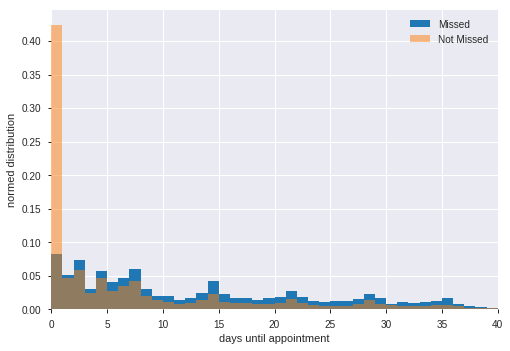

In [182]:
import matplotlib.pyplot as plt

plt.hist(df.loc[df.OUTPUT_LABEL == 1,'delta_days'], 
 label = 'Missed',bins = range(0,60,1), normed = True)
plt.hist(df.loc[df.OUTPUT_LABEL == 0,'delta_days'], 
 label = 'Not Missed',bins = range(0,60,1), normed = True,alpha =0.5)
plt.legend()
plt.xlabel('days until appointment')
plt.ylabel('normed distribution')
plt.xlim(0,40)
plt.show()

#### bit odd since most of the patients who did not miss their appointment scheduled the appointment on the same day

## Split Samples (important to shuffle)

In [193]:
df = df.sample(n= len(df),random_state = 42)
df = df.reset_index(drop = True)

df_valid = df.sample(frac = 0.3,random_state = 42)
df_train = df.drop(df_valid.index)

### check the prevelance 

In [195]:
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Valid prevalence(n = 33158):0.202
Train prevalence(n = 77369):0.202


#### Given this data comes from just Apr-Jun 2016 and their are no appointment times, we will just use these columns:

In [197]:
col2use = ['ScheduledDay_day', 'ScheduledDay_hour',
 'ScheduledDay_minute', 'ScheduledDay_dayofweek', 
 'AppointmentDay_day',
 'AppointmentDay_dayofweek', 'delta_days']

#### X (inputs) and Y(output) for training and validation:


In [201]:
X_train = df_train[col2use].values
X_valid = df_valid[col2use].values
y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training shapes: (77369, 7) (77369,)
Validation shapes: (33158, 7) (33158,)


## Train a Machine Learning Model
#### Random Forest

In [206]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 5, n_estimators = 100, random_state = 42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [209]:
y_train_preds = rf.predict_proba(X_train)[:,1]
y_valid_preds = rf.predict_proba(X_valid)[:,1]

## Evaluate performance

In [218]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)
def print_report(y_actual, y_pred, thresh):
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity
    

In [223]:
thresh = 0.201
print('Training:')
print_report(y_train,y_train_preds, thresh)
print("Validation:")
print_report(y_valid,y_valid_preds, thresh)

Training:
AUC:0.718
accuracy:0.520
recall:0.915
precision:0.285
specificity:0.420
prevalence:0.202
 
Validation:
AUC:0.714
accuracy:0.521
recall:0.922
precision:0.287
specificity:0.419
prevalence:0.202
 


(0.7139415449599998,
 0.5209602509198383,
 0.9216534845545441,
 0.28678894822382167,
 0.41947310730619497)

## ROC Curve

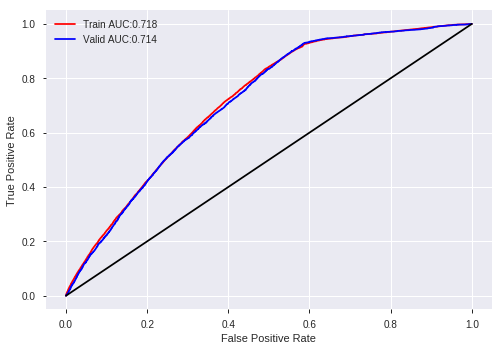

In [226]:
from sklearn.metrics import roc_curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)
plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot([0,1],[0,1],'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()